# MODELO EPIDÊMICO

## SIR model (MODELO SIR)

fonte: https://pt.wikipedia.org/wiki/Modelo_epid%C3%AAmico#O_Modelo_SIR

### O Modelo SIR
Em 1927, W. O. Kermack e A. G. McKendrick criaram um modelo em que se considera uma população fixa com apenas três compartimentos: sensíveis, S(t); infectado, I(t), e removido, R(t). Os compartimentos utilizados para este modelo consistem em três classes:
* S(t) é usado para representar o número de indivíduos não infectados com a doença no momento t, ou aqueles suscetíveis à doença. 
* I(t) representa o número de indivíduos que tenham sido infectadas com a doença e que são capazes de transmitir a doença aos da categoria susceptível. 
* R(t) é o compartimento utilizado para aqueles indivíduos que foram infectados e, de seguida, removidos a partir da doença, quer devido à imunização ou devido à morte. Os que estão nesta categoria não são capazes de ser infectados novamente ou para transmitir a infecção a outras pessoas. 

O fluxo do presente modelo pode ser considerado da seguinte forma: 

$\mathcal{S} \rightarrow \mathcal{I} \rightarrow \mathcal{R}$

Usando uma população fixa, $N = S(t) + I(t) + R(t)$, Kermack e McKendrick derivadas das seguintes equações:

$\frac{dS}{dt} = - \beta S I$ 

$\frac{dI}{dt} = \beta S I - \gamma I$

$\frac{dR}{dt} = \gamma I$

In [1]:
import matplotlib.pyplot as plt
import scipy.integrate as si
import numpy as np

In [2]:
#ODEs

def SIR_model(y,t,beta,gamma):
    S,I,R = y
    
    dS_dt = -beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    
    return ([dS_dt,dI_dt,dR_dt])
    


<img src = "img/SIR.png" style="max-width:20%; width: 20%;">

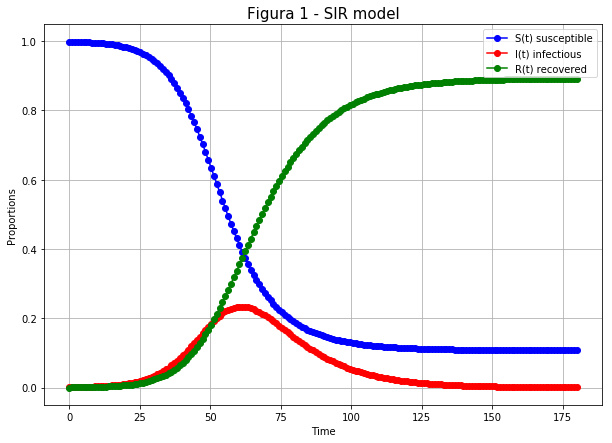

In [3]:
# S - susceptible
# I - for the number of infectious
# R - for the number of recovered 

So = 0.999
Io = 0.001
Ro = 0.0
beta = 0.2
gamma = 0.08

# Tempo
t = np.linspace(0,180,180)

# Solução
solution = si.odeint(
    SIR_model,
    [So,Io,Ro],
    t,
    args = (beta,gamma),
)
solution = np.array(solution)

# Plot 
plt.figure(figsize = (10,7))
plt.plot(t,solution[:,0],'-ob',label = 'S(t) susceptible')
plt.plot(t,solution[:,1],'-or',label = 'I(t) infectious')
plt.plot(t,solution[:,2],'-og',label = 'R(t) recovered')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Proportions')
plt.title('Figura 1 - SIR model',fontsize = 15)
plt.savefig('./fig_save/SIR01.png')

### O Modelo SIR com nascimentos e morte
Usando o processo do sarampo, por exemplo, existe uma chegada de novos indivíduos suscetíveis na população. Para este tipo de situação nascimentos e mortes devem ser incluídas no modelo. As seguintes equações diferenciais representam este modelo, assumindo uma taxa de mortalidade μ e taxa de natalidade igual à taxa de mortalidade:

$\frac{dS}{dt} = - \beta SI + \mu (N - S) $

$\frac{dI}{dt} = \beta SI - \gamma I - \mu I $

$\frac{dR}{dt} = \gamma I - \mu R $


In [4]:
#ODEs

def SIR_model(y,t,beta,gamma,N,u):
    S,I,R = y
    
    dS_dt = -beta*S*I + u*(N-S)
    dI_dt = beta*S*I - gamma*I - u*I
    dR_dt = gamma*I - u*R
    
    return ([dS_dt,dI_dt,dR_dt])
    

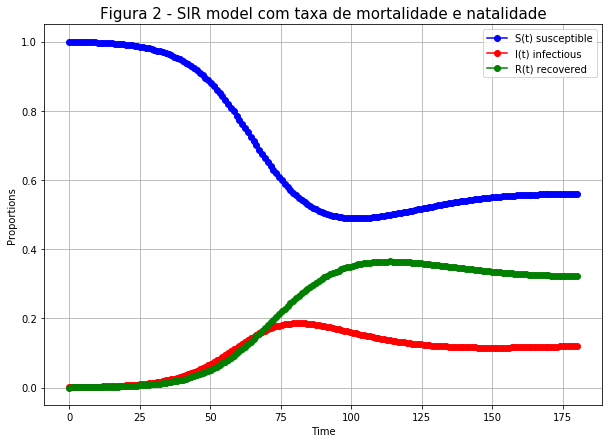

In [5]:
So = 1.0
Io = 0.001
Ro = 0.0

# Se u = N = 0... voltamos a Figura 1...
u = 0.03# Taxa de mortalidade do vírus (quanto ele mata)
N = 1.0# Taxa de nataidade


beta = 0.2
gamma = 0.08


# Tempo
t = np.linspace(0,180,180)

# Solução
solution = si.odeint(
    SIR_model,
    [So,Io,Ro],
    t,
    args = (beta,gamma,N,u),
)
solution = np.array(solution)

# Plot
plt.figure(figsize = (10,7))
plt.plot(t,solution[:,0],'-ob',label = 'S(t) susceptible')
plt.plot(t,solution[:,1],'-or',label = 'I(t) infectious')
plt.plot(t,solution[:,2],'-og',label = 'R(t) recovered')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.ylabel('Proportions')
plt.title('Figura 2 - SIR model com taxa de mortalidade e natalidade',fontsize = 15)
plt.savefig('./fig_save/SIR02.png')

Observe que na Figura 2 foi introduzida a taxa de mortalidade ($\mu$) e natalidade (N) em comparação com a Figura 1. Se a doença é agressiva (altos valores de $\mu$), as pessoas infectadas tendem a não transmitir, pois morrem. Na Figura 2, foi utilizada uma taxa de mortalidade de 3% (similar ao Covid-19). Logo, observou-se que as pessoas serão ainda infectadas, e muitas irão se curar. De acordo com a Figura 2, como sempre haverão pessoas infectadas, pode-se dizer que talvez todos um dia irão ser infectados pelo covid-19 (constância da curva vermelha).